<a href="https://colab.research.google.com/github/KaramMawas/InstanceSegmentation/blob/main/Lab2_DeepLearning_InstanceSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GeoGroup Deep Learning Lab 2**

[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/)

[Dr. Pedro M. Achanccaray Diaz](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz) (p.diaz@tu-bs.de)

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)

# **Lab 2: Instance segmentation using MMDetection**

In this lab session, we will cover the following topics:
- Installation of MMDetection
- Train a model with a custom dataset
- Test a trained model with new images

For this purpose, we will use two datasets: **UAV_images** and **Halls**.

The **UAV_images** were acquired in a previous session using a drone:

<center>

<img src="https://www.tu-braunschweig.de/fileadmin/Redaktionsgruppen/Institute_Fakultaet_3/IGP/Aktuelles/DJI_20231023132314_0012_V.JPG" width="500">

</center>

The **Halls** dataset are part of the images used in the project [SPP 2255 - C3](https://www.tu-braunschweig.de/en/igp/projects/spp2255-c3) for
 system hall detection.

You can download both dataset from the GeoGroup folder in nextcloud: `GeoGroup/Workshops/Workshop_Series_Deep_Learning/15012024_DeepLearning_InstanceSegmentation`

# **Working environment set up**

## **Mount Google Drive to Google Colab**

First, mount your Google Drive to Gooble Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then, go to your working directory. In this case: `Colabs/IGP/GeoGroup/DL_2/`

In [ ]:
%cd drive/MyDrive/InstanceSegmentation

/content/drive/MyDrive/InstanceSegmentation


## **Install MMDetection**

Run the following lines to install [MMDetection](https://github.com/open-mmlab/mmdetection/tree/main).

_This might take a couple of minutes, so it is a good time to go for a cup of coffee or tea._

**Important:** The following lines should be executed **only the first time** you install MMDetection:

```
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
```

Then, everytime you start a new Colab session, you have to execute the other lines.


---

Once the installation has finished, you will see the following message:

![](https://drive.google.com/uc?export=view&id=1074cHmM9qecqQTpFQd0e7amiy2vgOG27)

So, you need to click on `RESTART SESSION` to complete the MMDetection installation.

**Important:** After you restart the session, it might be necessary to mount your Google Drive again.

In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
# Important: run the following two lines only the
# first time to install mmdetection
#!rm -rf mmdetection
#!git clone https://github.com/open-mmlab/mmdetection.git

%cd mmdetection
%pip install -e .

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
/content/drive/MyDrive/InstanceSegmentation/mmdetection
Obtaining file:///content/drive/MyDrive/InstanceSegmentation/mmdetection
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.3.0
    Uninstalling mmdet-3.3.0:
      Successfully uninstalled mmdet-3.3.0
  Running setup.py develop for mmdet


## **Check MMDetection installation**

The following lines will help us to verify the installation.

In [ ]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.1.0+cu121 cuda: True
mmdetection: 3.3.0
mmcv: 2.1.0
mmengine: 0.10.2


# **Run inference with demo image**

To execute the following lines, **we must be located in the `mmdetection` directory**.

You can change the directory using the `cd`command:

```
%cd mmdetection
```



In [ ]:
# %cd mmdetection
# download the model then load it then check the inference with an image
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints

processing mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 9.3 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth to /content/drive/MyDrive/InstanceSegmentation/mmdetection/checkpoints
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py to /content/drive/MyDrive/InstanceSegmentation/mmdetection/checkpoints


In [ ]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
# Choose to use a config and initialize the detector
config_file = 'configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py'
# Setup a checkpoint file to load
checkpoint_file = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [ ]:
image = mmcv.imread('demo/demo.jpg',channel_order='rgb')
result = inference_detector(model, image)

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


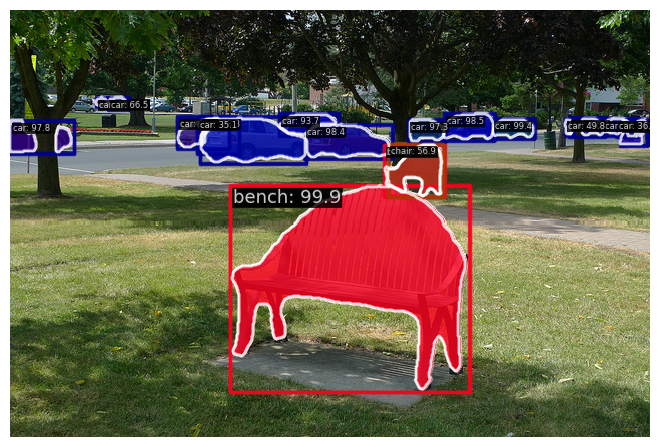

In [ ]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

# **Train with custom datasets - UAV images**

Let's import the necessary packages

In [ ]:
from mmengine import Config
from mmengine.runner import set_random_seed
from mmengine.runner import Runner
from mmengine.visualization import Visualizer
import mmcv
from mmdet.apis import init_detector, inference_detector

from glob import glob
from os.path import join,basename
from os import makedirs

This is an auxiliary function to save the obtained results after training the model.

In [ ]:
def save_results(TEST_PATH,
                 work_dir,
                 epoch,
                 threshold,
                 format):
  list_test = glob(join(TEST_PATH, format))
  checkpoint_file = join(work_dir,"epoch_{}.pth".format(epoch))
  results_dir = join(work_dir, "results")
  makedirs(results_dir, exist_ok=True)

  model = init_detector(cfg,
                        checkpoint_file,
                        device='cuda:0')

  for idx, img_path in enumerate(list_test):
    img = mmcv.imread(img_path, channel_order='rgb')
    new_result = inference_detector(model, img)

    visualizer_now = Visualizer.get_current_instance()
    visualizer_now.dataset_meta = model.dataset_meta
    # show the results
    visualizer_now.add_datasample(
        'new_result',
        img,
        data_sample=new_result,
        draw_gt=False,
        wait_time=0,
        out_file=join(results_dir, basename(img_path)),
        pred_score_thr=threshold
    )

## **Instance segmentation model**

We will use the Mask R-CNN architecture with ResNet 50 as backbone.

MMDetection offers many different architecture. You can see the Model Zoo [here](https://github.com/open-mmlab/mmdetection/tree/main?tab=readme-ov-file#overview-of-benchmark-and-model-zoo).

Now, we need to create the configuration file with information about our dataset and the selected architecture.

**Important:** Depending on the selected architecture, the configuration file might be different as each architecture has specific parameters.




The most important parameters are the ones related to our dataset:
- `cfg.metainfo`: information about the existing classes in our dataset and the palette to be used for visualization. Remember, the class names must be exactly the same used during annotation (including capital letters).
- `cfg.data_root`, `cfg.train_dataloader`,...: information about the path of images for train, validation, and test.


At this point, upload your dataset to the `mmdetection` folder. You can create a subfolder called `data` to upload your dataset. You should have a folder structure similar to the following:

  ```
    mmdetection
    ├── checkpoints
    ├── CITATION.cff
    ├── configs
    ├── data
      ├── Halls
      └── UAV_images
        └── train
            ├── DJI_20231023132057_0001_V.JPG
            ├── DJI_20231023132058_0002_V.JPG
            ├── DJI_20231023132059_0003_V.JPG
            ├── DJI_20231023132100_0004_V.JPG
            ├── DJI_20231023132108_0014_V.JPG
            ├── DJI_20231023132111_0017_V.JPG
            └── train_annotations.json
    ├── [...]
  ```

In [ ]:
def create_config(base_config,
                  checkpoint,
                  work_dir):
  cfg = Config.fromfile(base_config)

  # Modify dataset classes and color | should be exactly the same as json file same order and typing
  cfg.metainfo = {
      'classes': ('Person', 'Car'),
      'palette': [
          (220, 20, 60),
          (20, 220, 60),
      ]
  }

  # Modify dataset type and path
  cfg.data_root = './data/UAV_images/'

  cfg.train_dataloader.dataset.ann_file = 'train/train_annotations.json'
  cfg.train_dataloader.dataset.data_root = cfg.data_root
  cfg.train_dataloader.dataset.data_prefix.img = 'train/'
  cfg.train_dataloader.dataset.metainfo = cfg.metainfo

  # cfg.train_cfg.max_epochs = 20 # default is 12 in case we would like to change training epochs!

  cfg.val_dataloader.dataset.ann_file = 'train/train_annotations.json'
  cfg.val_dataloader.dataset.data_root = cfg.data_root
  cfg.val_dataloader.dataset.data_prefix.img = 'train/'
  cfg.val_dataloader.dataset.metainfo = cfg.metainfo

  cfg.test_dataloader.dataset.ann_file = 'train/train_annotations.json'
  cfg.test_dataloader.dataset.data_root = cfg.data_root
  cfg.test_dataloader.dataset.data_prefix.img = 'train/'
  cfg.test_dataloader.dataset.metainfo = cfg.metainfo

  # Modify metric config
  cfg.val_evaluator.ann_file = cfg.data_root+'train/train_annotations.json'
  cfg.test_evaluator.ann_file = cfg.data_root+'train/train_annotations.json'

  # Modify num classes of the model in box head and mask head
  cfg.model.roi_head.bbox_head.num_classes = 2 # number of classes
  cfg.model.roi_head.mask_head.num_classes = 2

  # We can still the pre-trained Mask RCNN model to obtain a higher performance
  cfg.load_from = checkpoint

  # Set up working dir to save files and logs.
  cfg.work_dir = work_dir

  # We can set the evaluation interval to reduce the evaluation times
  cfg.train_cfg.val_interval = 3
  # We can set the checkpoint saving interval to reduce the storage cost
  cfg.default_hooks.checkpoint.interval = 3

  # The original learning rate (LR) is set for 8-GPU training.
  # We divide it by 8 since we only use one GPU.
  cfg.optim_wrapper.optimizer.lr = 0.02 / 8
  cfg.default_hooks.logger.interval = 10

  # Set seed thus the results are more reproducible
  # cfg.seed = 0
  set_random_seed(0, deterministic=False)

  # We can also use tensorboard to log the training process
  cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

  return cfg

##**Configuration file**

Now, we need to create the configuration file.

For this purpose, we can take the available examples provided by MMDetection in the folder: `mmdetection/configs/`. There are configuration files for all available models (you can see the repository too: [configs](https://github.com/open-mmlab/mmdetection/tree/main/configs).

Then, we will fine tune a pre-trained model. Thus, we need to provide the `checkpoint`with the pre-trained model. You can see the model zoo to get the checkpoints.

For instance, for Mask RCNN, we have the following checkpoints: [Pre-trained Models](https://github.com/open-mmlab/mmdetection/tree/main/configs/mask_rcnn#pre-trained-models)

Finally, we need to provide a directory to save the model outcomes: trained model (checkpoint), logs, and results (inference).

In [ ]:
base_config = './configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-1x_coco.py' # define the config with the model
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth' # define the model
work_dir = './UAV_results' # this directory must be created before

cfg = create_config(base_config=base_config,
                    checkpoint=checkpoint,
                    work_dir=work_dir)

##**Train**

Now, we can train the model using the configuration file created before.

_This step can take several minutes, depending on the size of your dataset. Thus, again, it is a good oportunity to go for a cup of coffee or tea!._

In [ ]:
runner = Runner.from_cfg(cfg)
runner.train()

01/15 14:02:57 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_6

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


01/15 14:02:58 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
01/15 14:02:58 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_msra-5891d200.pth" to /root/.cache/torch/hub/checkpoints/resnet50_msra-5891d200.pth


01/15 14:03:12 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: conv1.bias

Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([3, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([3]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([8, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is

MaskRCNN(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)

##**Test**

Once the model is trained, we can test it with new images.

In this case, we will use the same images that were used for training.

In a real scenario, we should create three sets from our dataset: train, validation, and test, where we just need annotations for train and validation. Annotations for test can be created to compute accuracy metrics too.

The results are saved in the working directory. In this case: `mmdetection/UAV_results/`

In [ ]:
TEST_PATH = "./data/UAV_images/train/"

In [ ]:
save_results(TEST_PATH=TEST_PATH,
             work_dir=work_dir,
             epoch=12,
             threshold=0.25,
             format="*.JPG")

Loads checkpoint by local backend from path: ./UAV_results/epoch_12.pth


# **Train with custom datasets - Halls dataset**

In [ ]:
def create_config(base_config,
                  checkpoint,
                  work_dir):
  cfg = Config.fromfile(base_config)

  # Modify dataset classes and color
  cfg.metainfo = {
      'classes': ('system_hall',),
      'palette': [
          (220, 20, 60),
      ]
  }

  # Modify dataset type and path
  cfg.data_root = './data/Halls/'

  cfg.train_dataloader.dataset.ann_file = 'val/annotation_coco.json'
  cfg.train_dataloader.dataset.data_root = cfg.data_root
  cfg.train_dataloader.dataset.data_prefix.img = 'val/'
  cfg.train_dataloader.dataset.metainfo = cfg.metainfo

  cfg.val_dataloader.dataset.ann_file = 'val/annotation_coco.json'
  cfg.val_dataloader.dataset.data_root = cfg.data_root
  cfg.val_dataloader.dataset.data_prefix.img = 'val/'
  cfg.val_dataloader.dataset.metainfo = cfg.metainfo

  cfg.test_dataloader.dataset.ann_file = 'val/annotation_coco.json'
  cfg.test_dataloader.dataset.data_root = cfg.data_root
  cfg.test_dataloader.dataset.data_prefix.img = 'val/'
  cfg.test_dataloader.dataset.metainfo = cfg.metainfo

  # Modify metric config
  cfg.val_evaluator.ann_file = cfg.data_root+'val/annotation_coco.json'
  cfg.test_evaluator.ann_file = cfg.data_root+'val/annotation_coco.json'

  # Modify num classes of the model in box head and mask head
  cfg.model.roi_head.bbox_head.num_classes = 1
  cfg.model.roi_head.mask_head.num_classes = 1

  # We can still the pre-trained Mask RCNN model to obtain a higher performance
  cfg.load_from = checkpoint

  # Set up working dir to save files and logs.
  cfg.work_dir = work_dir

  # We can set the evaluation interval to reduce the evaluation times
  cfg.train_cfg.val_interval = 3
  # We can set the checkpoint saving interval to reduce the storage cost
  cfg.default_hooks.checkpoint.interval = 3

  # The original learning rate (LR) is set for 8-GPU training.
  # We divide it by 8 since we only use one GPU.
  cfg.optim_wrapper.optimizer.lr = 0.02 / 8
  cfg.default_hooks.logger.interval = 10

  # Set seed thus the results are more reproducible
  # cfg.seed = 0
  set_random_seed(0, deterministic=False)

  # We can also use tensorboard to log the training process
  cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

  return cfg

In [ ]:
TEST_PATH = "./data/Halls/val/"

In [ ]:
base_config = './configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-1x_coco.py'
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
work_dir = './Halls_results' # this directory must be created before

cfg = create_config(base_config=base_config,
                    checkpoint=checkpoint,
                    work_dir=work_dir)

In [ ]:
runner = Runner.from_cfg(cfg)
runner.train()

01/10 10:42:32 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_6

MaskRCNN(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)

In [ ]:
save_results(TEST_PATH=TEST_PATH,
             work_dir=work_dir,
             epoch=12,
             threshold=0.5,
             format="*.png")

Loads checkpoint by local backend from path: ./Halls_results/epoch_12.pth
